Shape: (114000, 21)
Columns: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64

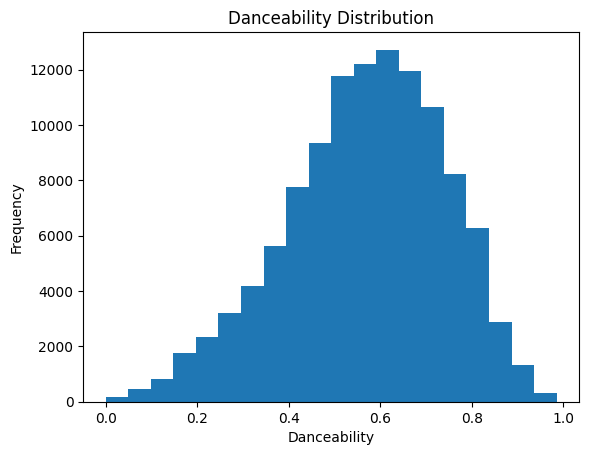

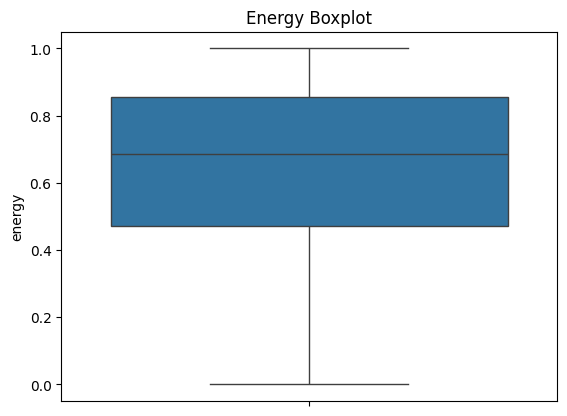

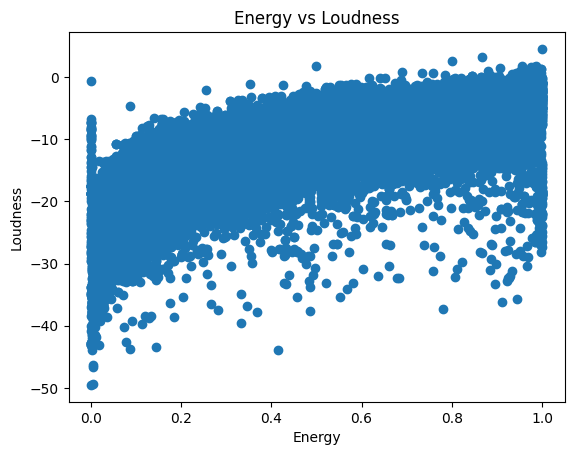

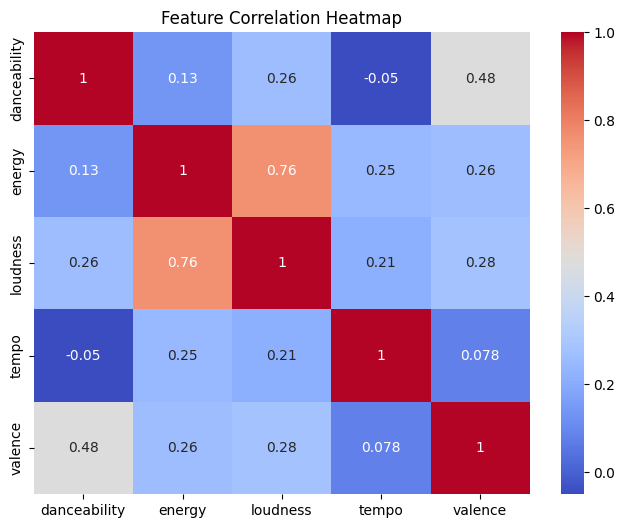

Accuracy: 0.9998684210526316


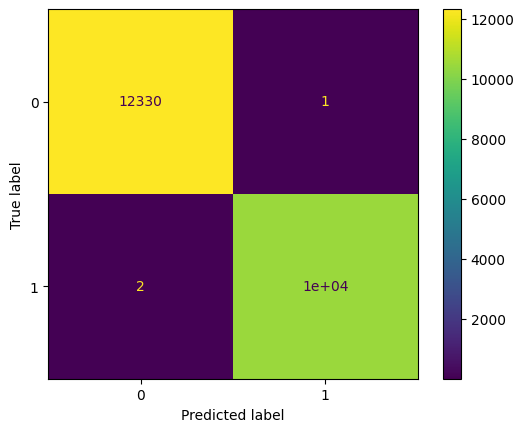

KNN Accuracy: 0.983640350877193


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("dataset.csv")
df.head()
df.tail()
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

#question 2
# a - checkin missing values
df.isnull().sum()
# b - handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
# c - select numerical features/figures
features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
X = df[features]
# d - standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

#question 3
# a - histogram of dancability
plt.figure()
plt.hist(df['danceability'], bins=20)
plt.title("Danceability Distribution")
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.show()

# b
plt.figure()
sns.boxplot(y=df['energy'])
plt.title("Energy Boxplot")
plt.show()

# c
plt.figure()
plt.scatter(df['energy'], df['loudness'])
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.title("Energy vs Loudness")
plt.show()

# d
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#question 5
df['mood'] = np.where(df['valence'] >= 0.5, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df['mood'], test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#bonusquestion 6
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
